In [1]:
# Historic DataOverview Playground.
# Will be deletet in the final Version

In [1]:
import site
import os
import sys
import ssl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import sktime
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sktime.datasets._single_problem_loaders import load_UCR_UEA_dataset
ssl._create_default_https_context = ssl._create_unverified_context


print(sys.executable)

# Print paths to all site-packages directories
for path in site.getsitepackages():
    print(path)

/Users/david/Documents/Studium D&E/Applied AI/David_MA/.venv/bin/python
/Users/david/Documents/Studium D&E/Applied AI/David_MA/.venv/lib/python3.11/site-packages


In [2]:
# Different DataLoading Options

from aeon.datasets import load_classification

X, y = load_classification("Beef", split="TRAIN")
X, y, meta_data = load_classification(name="ElectricDevices", return_metadata=True) 
meta_data

{'problemname': 'electricdevices',
 'timestamps': False,
 'missing': False,
 'univariate': True,
 'equallength': True,
 'classlabel': True,
 'targetlabel': False,
 'class_values': ['1', '2', '3', '4', '5', '6', '7']}

In [3]:
#"ElectricDevices" "AbnormalHeartbeat" "Adiac"
X, y = load_UCR_UEA_dataset(name="ElectricDevices", split=None, return_X_y=True, return_type=None, extract_path=None)

X = X.rename(columns={'dim_0': 'ts_i'})
ts_o = X.loc[0,:]
print(ts_o)
X["ts_i"][0]

ts_i    0    -0.186109
1    -0.186109
2    -0.186109
3...
Name: 0, dtype: object


0    -0.186109
1    -0.186109
2    -0.186109
3    -0.186109
4    -0.186109
        ...   
91   -0.186109
92   -0.186109
93   -0.186109
94   -0.186109
95   -0.186109
Length: 96, dtype: float64

/var/folders/bj/qcw9vb7x48j_hnyzlrj_pqtr0000gn/T/ipykernel_78302/1471361420.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab10', 8)


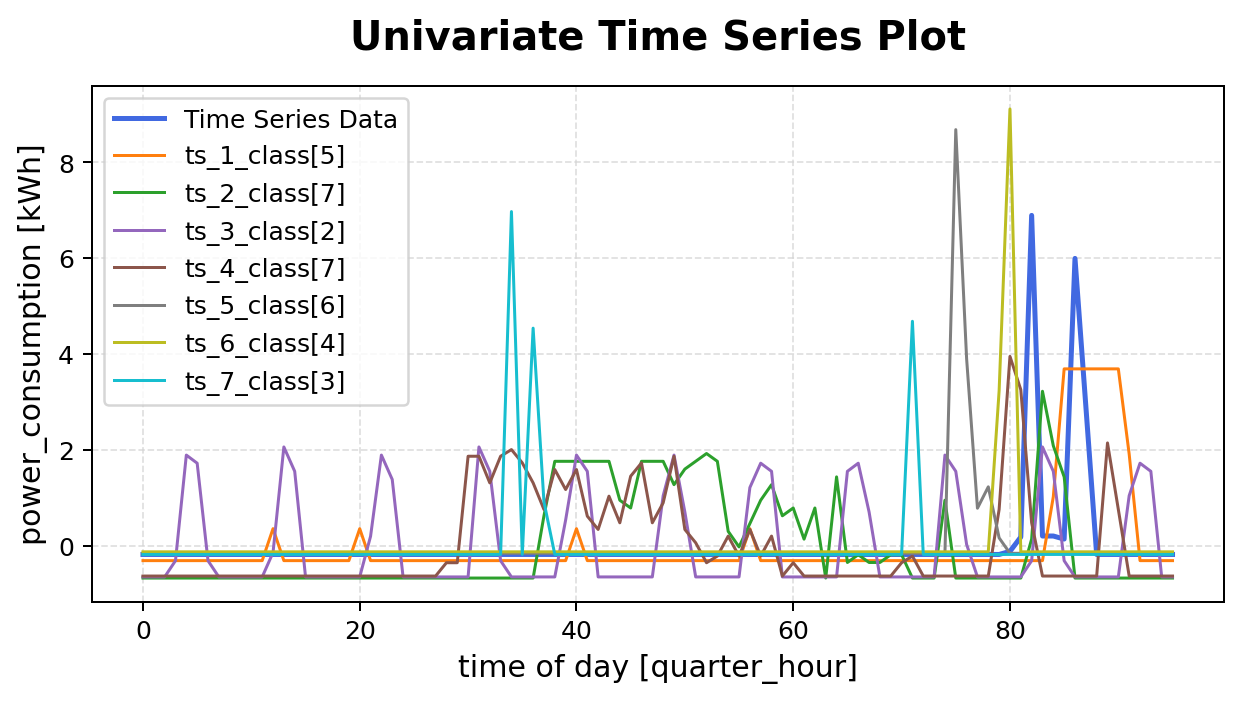

In [4]:
np.random.seed(43)
rand_ind = np.random.choice(3000, 10, replace=False)

fig, ax = plt.subplots(figsize=(7, 4), dpi=180)
cmap = plt.cm.get_cmap('tab10', 8)

# Customize the plot
ax.plot(X['ts_i'][0], color='royalblue', linewidth=2, label='Time Series Data')

for _col in range(1, 8):
    ax.plot(X["ts_i"][rand_ind[_col]], color=cmap(_col), linewidth=1.2, label="ts_{}_class[{}]".format(_col, y[rand_ind[_col]]))

# Add grid with custom styling
ax.grid(color='#d3d3d3', linestyle='--', linewidth=0.7, alpha=0.7)

# Set title and labels
ax.legend(loc='upper left', fontsize=10)
ax.set_title('Univariate Time Series Plot', fontsize=16, fontweight='bold', pad=15)
ax.set_xlabel('time of day [quarter_hour]', fontsize=12)
ax.set_ylabel('power_consumption [kWh]', fontsize=12)

plt.tight_layout()

In [5]:
def get_first_n_indexes(array, target_class, n=10):
    # Find the indexes where the array matches the target class
    matching_indexes = np.where(array == target_class)[0]
    
    # Return the first n indexes or all indexes if there are less than n
    return matching_indexes[:n]

def get_class_ind_dict(_array, n=8):
    class_ind_dict = {}
    for class_ in np.unique(_array):
        class_ind = get_first_n_indexes(_array, target_class=class_, n=n)
        class_ind_dict[class_] = class_ind
    return class_ind_dict



class_6_ind = get_first_n_indexes(y, target_class="6", n=8)
print(class_6_ind)
class_ind_dict = get_class_ind_dict(_array=y)
assumption_encoder = {"1": "dishwasher", "2":"freezer or fridge", "3":"kettle or oven",
                       "4": "washing_machine, oven", "5": "oven", "6": "oven", "7":"television or Computer"}

[1422 1423 1424 1425 1426 1427 1428 1429]


/var/folders/bj/qcw9vb7x48j_hnyzlrj_pqtr0000gn/T/ipykernel_78302/2533253044.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab10', 8)


Text(0, 0.5, 'power_consumption [kWh]')

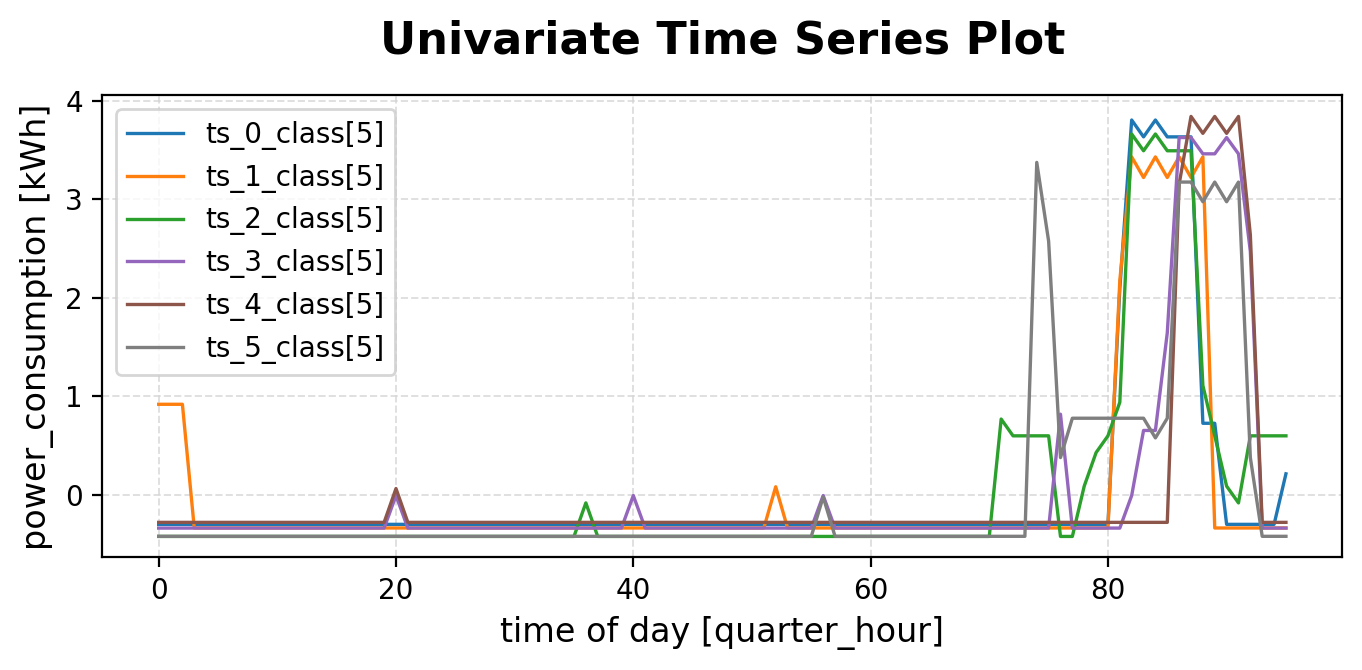

In [6]:
current_class_ = "5"
current_ind_list = class_ind_dict[current_class_]

fig, ax = plt.subplots(figsize=(8, 3), dpi=200)
cmap = plt.cm.get_cmap('tab10', 8)
for _col in range(0, 6):
    ax.plot(X["ts_i"][current_ind_list[_col]], color=cmap(_col), linewidth=1.2, label="ts_{}_class[{}]".format(_col, y[current_ind_list[_col]]))


# Add grid with custom styling
ax.grid(color='#d3d3d3', linestyle='--', linewidth=0.7, alpha=0.7)

# Set title and labels
ax.legend(loc='upper left', fontsize=10)
ax.set_title('Univariate Time Series Plot', fontsize=16, fontweight='bold', pad=15)
ax.set_xlabel('time of day [quarter_hour]', fontsize=12)
ax.set_ylabel('power_consumption [kWh]', fontsize=12)

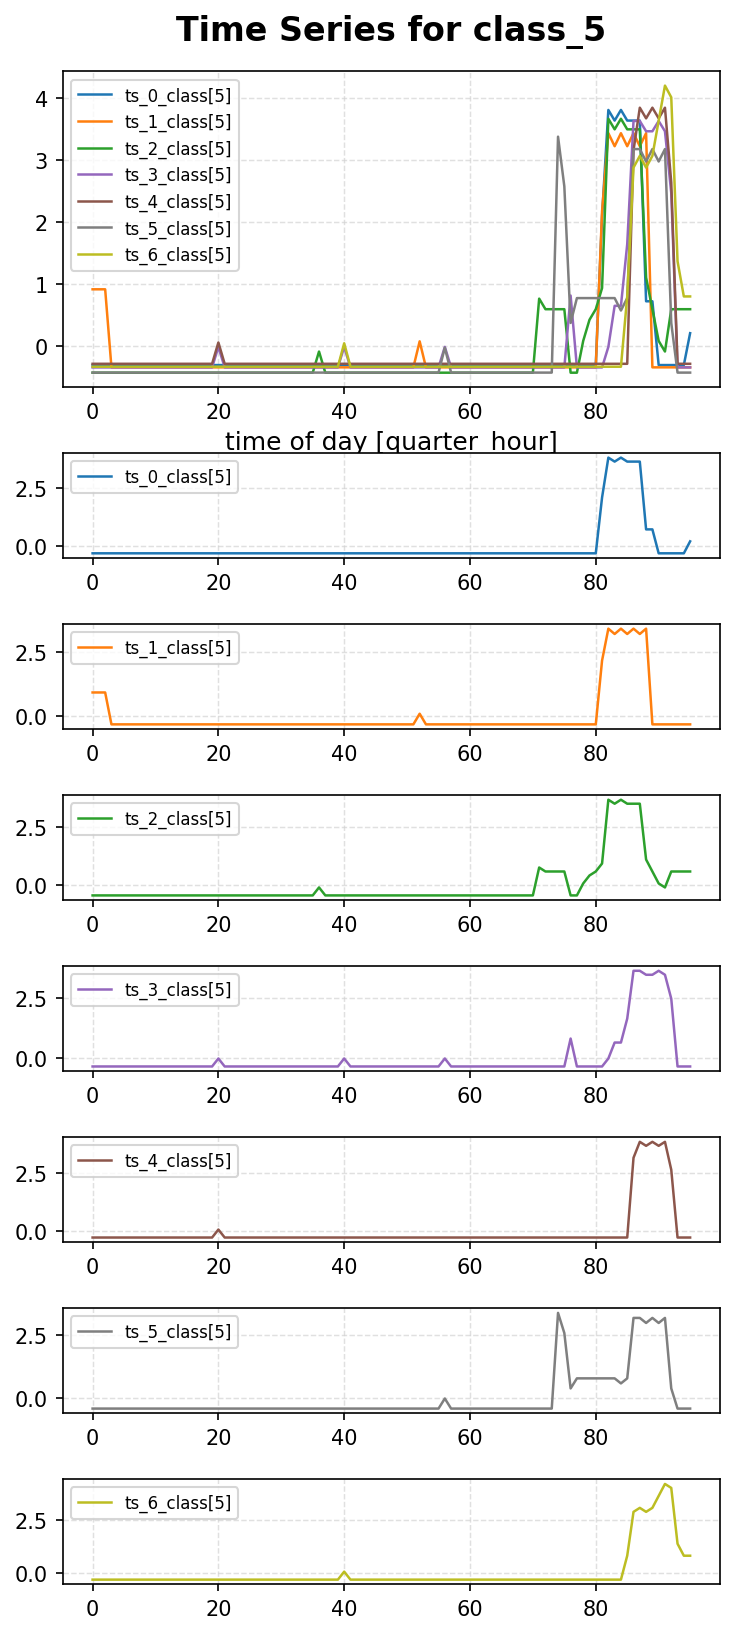

In [7]:
num_of_subplots=8 
# Create 8 subplots where the first plot is the summary_plot of the subsequent 7 independent plots of a given
# time_series of class K where class K is out of the class_pool [1,2,3,4,5,6,7]

fig, axes = plt.subplots(nrows=num_of_subplots, ncols=1, figsize=(5, 11), dpi=150, gridspec_kw={'height_ratios': [3] + [1] * (num_of_subplots-1)})

for _col in range(0, num_of_subplots-1):
    axes[0].plot(X["ts_i"][current_ind_list[_col]], color=cmap(_col), linewidth=1.2,
                 label="ts_{}_class[{}]".format(_col, y[current_ind_list[_col]]))

# Add grid and legend for the summary plot
axes[0].grid(color='#d3d3d3', linestyle='--', linewidth=0.7, alpha=0.7)
axes[0].legend(loc='upper left', fontsize=8)
axes[0].set_title("Time Series for class_{}".format(current_class_), fontsize=16, fontweight='bold', pad=15)
axes[0].set_xlabel('time of day [quarter_hour]', fontsize=12)

for _col in range(0, num_of_subplots-1):
    ax = axes[_col + 1]  # Access the subplot (start from index 1)
    ax.plot(X["ts_i"][current_ind_list[_col]], color=cmap(_col), linewidth=1.2,
            label="ts_{}_class[{}]".format(_col, y[current_ind_list[_col]]))
    
    # Add grid and legend to each independent subplot
    ax.grid(color='#d3d3d3', linestyle='--', linewidth=0.7, alpha=0.7)
    ax.legend(loc='upper left', fontsize=8)
    #ax.set_title("time_series_class_{}".format(current_class_))
    #ax.set_xlabel('time of day [quarter_hour]', fontsize=12)

# Adjust spacing between subplots for better visibility
plt.tight_layout()
plt.subplots_adjust(hspace=0.5)  # Increase this value to create more space between plots
plt.show()

X_train             : (8926, 1, 96)
y_train             : (8926,)
X_test              : (7711, 1, 96)
y_test              : (7711,)
X_train_small       : (178, 1, 96)
y_train_small       : (178,)
X_test_small        : (154, 1, 96)
y_test_small        : (154,)


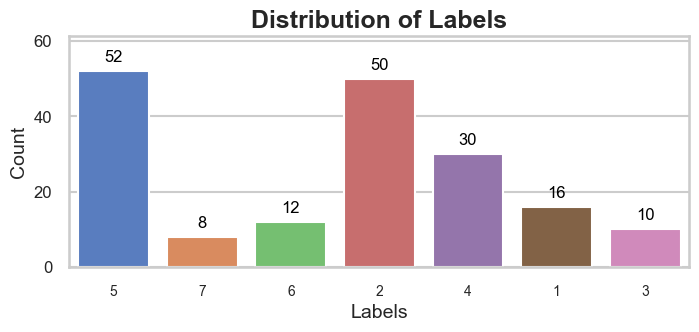

In [8]:
# Code fragments for data_loading
#"ElectricDevices" "AbnormalHeartbeat" "Adiac"
#X_train, y_train = load_UCR_UEA_dataset(name="ElectricDevices", split="train", return_X_y=True, return_type="numpy3D", extract_path=None)
#X_test, y_test = load_UCR_UEA_dataset(name="ElectricDevices", split="test", return_X_y=True, return_type="numpy3D", extract_path=None)
X_, y_ = load_UCR_UEA_dataset(name="ElectricDevices", return_X_y=True, return_type="numpy3D", extract_path=None)


#Make a train test split if necessary 
test_set_size = 7711/(8926 +7711) 
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=test_set_size, random_state=42)


# Shuffle indices and select a smaller subset
reduction_factor= 50
np.random.seed(33)
train_indices = np.random.permutation(len(X_train))
test_indices = np.random.permutation(len(X_test))
reduced_train_indices = train_indices[:len(X_train) // reduction_factor]
reduced_test_indices = test_indices[:len(X_test) // reduction_factor]


X_train_small, y_train_small = X_train[reduced_train_indices], y_train[reduced_train_indices]
X_test_small, y_test_small = X_test[reduced_test_indices], y_test[reduced_test_indices]
#---> Different return types ! 

train_test_arrays = {"X_train": X_train, "y_train": y_train, "X_test": X_test, "y_test": y_test,
                     "X_train_small": X_train_small,"y_train_small": y_train_small, "X_test_small": X_test_small,"y_test_small": y_test_small }

for name, array in train_test_arrays.items():
    print(f"{name:<20}: {array.shape}")



#Code fragment for dataset_overview

sns.set_theme(style="whitegrid", context="talk")
y_df = pd.DataFrame(y_train_small, columns=["Label"])

# Create the count plot
plt.figure(figsize=(8, 3))
ax = sns.countplot(data=y_df, x=y_df["Label"], hue=y_df["Label"] ,palette='muted') #order=Y_data['activity_label'].value_counts().index)

# Add annotations
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10), 
                textcoords='offset points')

# Customizing plot aesthetics
ax.set_title('Distribution of Labels', fontsize=18, weight='bold')
ax.set_xlabel('Labels', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
max_count = y_df.value_counts().max()  # Find the max count
y_lim = plt.ylim(0, max_count * 1.18)  # Increase the y-axis limit by 20%
x_ticks= plt.xticks(fontsize=10)
y_ticks = plt.yticks(fontsize=12)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=test_set_size, random_state=42)

In [ ]:
### AEON 1.0.0 available Classifiers 

from aeon.classification.distance_based import ProximityForest, ElasticEnsemble , KNeighborsTimeSeriesClassifier #---> ERROR
from aeon.classification.interval_based import TimeSeriesForestClassifier, RandomIntervalSpectralEnsembleClassifier
from aeon.classification.shapelet_based import RSASTClassifier , RDSTClassifier #A random dilated shapelet transform (RDST) classifier.
from aeon.classification.dictionary_based import IndividualBOSS, ContractableBOSS, WEASEL, TemporalDictionaryEnsemble ## ERROR
from aeon.classification.deep_learning import TimeCNNClassifier, ResNetClassifier
from aeon.classification.convolution_based import RocketClassifier, Arsenal


#-------DISTANCE_BASED_CLASSIFIERS---------#
#DTW    ---> if c == "kneighborstimeseriesclassifier" or c == "dtw" or c == "1nn-dtw": return KNeighborsTimeSeriesClassifier(distance="dtw", n_jobs=n_jobs, **kwargs)
DTW_1NN = KNeighborsTimeSeriesClassifier(distance="dtw")
#Arsenal
#ShapeDTW
EE_c = ElasticEnsemble(distance_measures=["dtw"]) #computational expensive (>11m)
Prox_Forest = ProximityForest()

#-------SHAPELET_BASED_CLASSIFIERS---------#
RDST_c = RDSTClassifier()
RSAST_c = RSASTClassifier() #Random Scalable and Accurate Subsequence Transform (RSAST)

#-------INTERVAL_BASED_CLASSIFIERS---------#
TS_Forest = TimeSeriesForestClassifier(n_estimators=100, random_state=0)
RISE_c = RandomIntervalSpectralEnsembleClassifier()
#R-STSF

#-------DICTIONARY_BASED_CLASSIFIERS---------#
Boss_I = IndividualBOSS()
TDE_c = TemporalDictionaryEnsemble() # computational expensive (>2m)
Weaselv1 = WEASEL(alphabet_size=4, p_threshold=0.05) 

#-------CONVOLUTION_BASED_CLASSIFIERS---------#
Rocket_Cl = RocketClassifier()
Arsenal_c = Arsenal()

#-------DEEP_LEARNING_BASED_CLASSIFIERS---------#
T_CNN = TimeCNNClassifier(avg_pool_size=3, batch_size=16, n_epochs=2000, n_layers=2, random_state=0)
ResNet_c = ResNetClassifier() # computational expensive (>5m)

#KN_Cl = KNeighborsTimeSeriesClassifier(distance="euclidean")


tsc_classifier = TS_Forest


tsc_classifier.fit(X_train_small, y_train_small)
y_pred = tsc_classifier.predict(X_test_small)
acc_score = accuracy_score(y_test_small, y_pred)
acc_score #0.6334

In [10]:
resample_id=0
classifier_dict = {    
    "Prox_Forest" : ProximityForest(random_state=resample_id), #computational expensive (10m)
    "EE_c" : ElasticEnsemble(distance_measures=["dtw"], random_state=resample_id), #computational expensive (>11m)
    "RDST_c" : RDSTClassifier(random_state=resample_id),
    "RSAST_c": RSASTClassifier(),
    "TS_Forest": TimeSeriesForestClassifier(n_estimators=100, random_state=resample_id),
    "RISE_c" : RandomIntervalSpectralEnsembleClassifier(random_state=resample_id),
    "Boss_I" : IndividualBOSS(random_state=resample_id),
    "TDE_c" : TemporalDictionaryEnsemble(random_state=resample_id), # computational expensive (>2m)
    "Weaselv1" : WEASEL(alphabet_size=4, p_threshold=0.05, random_state=resample_id), 
    "T_CNN": TimeCNNClassifier(avg_pool_size=3, batch_size=16, n_epochs=2000, n_layers=2, random_state=0),
    "Rocket_Cl": RocketClassifier(random_state=resample_id)}

NameError: name 'ProximityForest' is not defined

In [ ]:
from tsml_eval.publications.y2023.tsc_bakeoff import _set_bakeoff_classifier
bakeoff_classifier_list = [
    # distance based
    "KNeighborsTimeSeriesClassifier","GRAILClassifier",
    # feature based
    "Catch22Classifier","FreshPRINCEClassifier",
    # shapelet based
    "RDSTClassifier","RandomShapeletForestClassifier", 
    # interval based
    "RSTSFClassifier","RandomIntervalSpectralEnsembleClassifier","TimeSeriesForestClassifier",
    # dictionary based
    "BOSSEnsemble","weasel v1","weasel_v2",
    # convolution based
    "RocketClassifier","Arsenal",
    # deep learning
    "CNNClassifier","ResNetClassifier",
    # hybrid
    ]

bakeoff_classifier_dict = {}
for cl in bakeoff_classifier_list:
    bakeoff_classifier_dict[cl]=_set_bakeoff_classifier(classifier_name=cl, random_state=0,n_jobs=1)
    print(cl)

In [ ]:
#average pooling size: 3, Batch size: 16, Kernel size: 7, Number of epochs: 2000, Number of layers: 2
# Deep Learning based classifier
T_CNN = _set_bakeoff_classifier(classifier_name="CNNClassifier", random_state=0,n_jobs=1)
T_CNN.fit(X_train_small, y_train_small)
y_pred_cnn= T_CNN.predict(X_test_small)
acc_score_2 = accuracy_score(y_test_small, y_pred_cnn)
acc_score_2 #0.5948

In [ ]:
# Convolution based classifier 
Rocket_Cl.fit(X=X_train_small,y=y_train_small)
y_pred_rocket = Rocket_Cl.predict(X_test_small)
acc_score_rocket = accuracy_score(y_test_small, y_pred_rocket)
acc_score_rocket #0.6545

In [30]:
# Creating a pipeline
current_datasets = ["FaceAll", "Beef", "Earthquakes", "ElectricDevices", "KeplerLightCurves"]
default_splits = {"FaceAll" :0.5 ,
                  "Beef"    :0.5
                  }

In [11]:
import time

def dataset_provider(name="FaceAll", reduction_factor=20, test_set_ratio=None, random_state=42, current_ds=None):
    X_, y_, meta_ = load_classification(name=name, return_metadata=True) 

    #Make a train test split if necessary.
    if test_set_ratio == None:
        test_set_size = 7711/(8926 +7711)
    else: 
        test_set_size = test_set_ratio
        
    # Differentiate between benchmark split & manual split  
    if test_set_ratio == "default_benchmark":
        X_train, y_train = load_classification(name=name,split="train" , return_metadata=False) 
        X_test, y_test = load_classification(name=name, split="test", return_metadata=False)
    else:
        X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=test_set_size, random_state=random_state)


    # Shuffle indices and select a smaller subset
    if reduction_factor != 1:
        np.random.seed(random_state)
        train_indices = np.random.permutation(len(X_train))
        test_indices = np.random.permutation(len(X_test))
        reduced_train_indices = train_indices[:len(X_train) // reduction_factor]
        reduced_test_indices = test_indices[:len(X_test) // reduction_factor]

        X_train_small, y_train_small = X_train[reduced_train_indices], y_train[reduced_train_indices]
        X_test_small, y_test_small = X_test[reduced_test_indices], y_test[reduced_test_indices]
        #---> Different return types ! 
    else:
        X_train_small, y_train_small, X_test_small, y_test_small = X_train, y_train, X_test, y_test


    train_test_arrays = {"X_train": X_train, "y_train": y_train, "X_test": X_test, "y_test": y_test,
                        "X_train_small": X_train_small,"y_train_small": y_train_small, "X_test_small": X_test_small,"y_test_small": y_test_small }
    for name, array in train_test_arrays.items():
        print(f"{name:<20}: {array.shape}")

    return train_test_arrays

def dataset_overview(train_test_array, dataset_name="FaceAll", top_gap=0.18):
    y_df = pd.DataFrame(train_test_array, columns=["Label"])

    # Create the count plot
    plt.figure(figsize=(7, 2.8), dpi=120)
    ax = sns.countplot(data=y_df, x=y_df["Label"], hue=y_df["Label"] ,palette='muted') #order=Y_data['activity_label'].value_counts().index)

    # Add annotations
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', fontsize=12, color='black', xytext=(0, 10), 
                    textcoords='offset points')

    # Customizing plot aesthetics
    ax.set_title(f'label distribution [{dataset_name}]', fontsize=18, weight='bold')
    ax.set_xlabel('Labels', fontsize=14)
    ax.set_ylabel('Count', fontsize=14)
    max_count = y_df.value_counts().max()  # Find the max count
    y_lim = plt.ylim(0, max_count * (1+top_gap))  # Increase the y-axis limit by top_gap%
    x_ticks= plt.xticks(fontsize=10)
    y_ticks = plt.yticks(fontsize=12)

    return x_ticks, y_ticks


def apply_TSC_algos(train_test_array, classifiers, exclude_classifiers=[" "]):
    pred_dict = {} #{"alg_name": {"accuracy": 0.0, "y_pred": [0,0,0], "y_pred_prob": [0,0,0]}}
    # Looping through the classifiers
    if not isinstance(classifiers, dict):
        raise TypeError("Classifiers should be a dictionary with names as keys and classifier objects as values.")
   
    for name, clf in classifiers.items():
        if name not in exclude_classifiers:
            start_time = time.time()
            print(f"Classifier: {type(clf).__name__}")
            clf.fit(train_test_array["X_train_small"],train_test_array["y_train_small"])
            train_time = time.time() - start_time
            y_pred = clf.predict(train_test_array["X_test_small"])
            y_pred_prob = clf.predict_proba(train_test_array["X_test_small"])
            acc_score = accuracy_score(train_test_array["y_test_small"], y_pred)
            eval_time = time.time() - start_time - train_time
            print("---------------------------- "+ f"Train time={train_time:.2f}s, Eval Time={eval_time:.2f}s")
            pred_dict[name] = {"accuracy":acc_score, "y_pred":y_pred,"y_pred_prob":y_pred_prob}
        else:
            pass
        
    print("\n" + f'{"Algorithm":<34}{"Accuracy"}')   
    for name, pred in pred_dict.items():
        acc = pred["accuracy"]
        print(f"{name:<33} {acc:.4f}")

    return pred_dict    

X_train             : (30, 1, 470)
y_train             : (30,)
X_test              : (30, 1, 470)
y_test              : (30,)
X_train_small       : (30, 1, 470)
y_train_small       : (30,)
X_test_small        : (30, 1, 470)
y_test_small        : (30,)


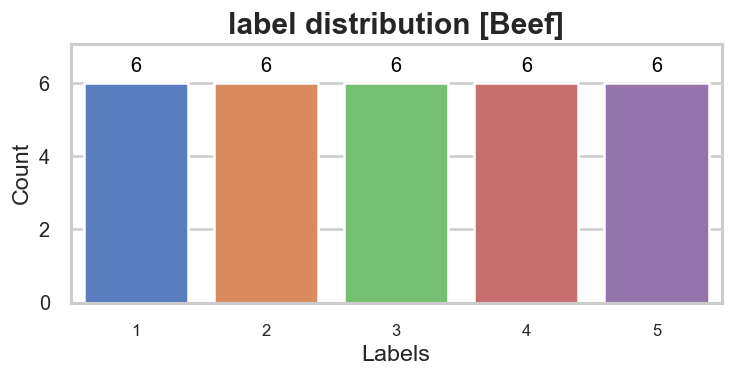

In [12]:
train_test_Beef = dataset_provider(name="Beef", reduction_factor=1,test_set_ratio="default_benchmark")
x_ticks, y_ticks = dataset_overview(train_test_array=train_test_Beef["y_test_small"], dataset_name="Beef")

In [13]:
label_names, label_counts = np.unique(train_test_Beef["y_train"], return_counts=True)
rlc1, rlc2 = np.random.choice(label_names, size=2, replace=False)
idx_l1 = np.where(train_test_Beef["y_train"]==rlc1)[0]
idx_l1

array([24, 25, 26, 27, 28, 29])

In [ ]:
res = apply_TSC_algos(train_test_array=train_test_Beef, classifiers=classifier_dict, exclude_classifiers=["EE_c", "TDE_c"])
# results seem to be partly identical with first fold of bakeoff paper. However for individual cases this is not true. It seems like 
# the given random-state parameter which is currently unknown leads to this behavior. Consequently further investigation effort has to be done
# to retrieve/enlighten the hidden parameter declaration. For ProxF(e), RDST_c, TS_F, Weasel_v1 results seem equal.
#  For RISE_c, T_CNN , Rocket_Cl there is a deviation

In [ ]:
res_Beef = apply_TSC_algos(train_test_array=train_test_Beef, classifiers=bakeoff_classifier_dict,
                            exclude_classifiers=["RSTSFClassifier","RandomIntervalSpectralEnsembleClassifier","ResNetClassifier", "CNNClassifier"])

In [ ]:
# Initialize Manual Benchmarking 

import os

df = pd.read_csv("benchmark/1NN-DTW_accuracy.csv")
df.loc[df["Resamples:"]=="Beef", "Resamples:":"2"]
# Define the directory containing your CSV files
directory = "benchmark/"  # Replace with the actual path
csv_list = [
    "1NN-DTW_accuracy.csv",
    "GRAIL_accuracy.csv",
    "Catch22_accuracy.csv",
    "FreshPRINCE_accuracy.csv",
    "RDST_accuracy.csv",
    "RSF_accuracy.csv",
    "TSF_accuracy.csv",
    "BOSS_accuracy.csv",
    "WEASEL-1_accuracy.csv",
    "WEASEL-2_accuracy.csv",
    "ROCKET_accuracy.csv",
    "Arsenal_accuracy.csv"]

# Loop through all files in the directory
#for filename in os.listdir(directory):
for filename in csv_list:
    file_path = os.path.join(directory, filename)  # Construct full file path
    
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_path)
    
    # Print one entry (for example, the first row)
    print(f"From file: {filename}")
    if not df.empty:  # Check if the CSV is not empty
        #print(df.loc[4,"Resamples:":"0"])
        print(df.loc[df["Resamples:"]=="Beef", "Resamples:":"0"])
        #print(df.iloc[0,5])  # Print the first row of the CSV
    else:
        print("The CSV file is empty!")
    print("\n")  # Separate entries for readability

In [ ]:
res_Beef["weasel v1"]["y_pred_prob"].round(3)[0:10]



In [ ]:
from sklearn import metrics

cm = metrics.confusion_matrix(train_test_Beef["y_test_small"], res_Beef["weasel v1"]["y_pred"])

fig = plt.figure(figsize=(6,4), dpi=150)
sns.heatmap(cm, annot=True, linewidths=.5, square = True, cmap = 'PRGn') #fmt=".0f"
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title("Confusion_Matrix_Beef", size = 15)
fig.tight_layout()

In [ ]:
res_Beef = apply_TSC_algos(train_test_array=train_test_Beef, classifiers=bakeoff_classifier_dict,
                            exclude_classifiers=["RSTSFClassifier","RandomIntervalSpectralEnsembleClassifier","ResNetClassifier"])

In [38]:
from tsml_eval.publications.y2023.tsc_bakeoff import _run_experiment

In [ ]:
train_test_ElectricD = dataset_provider(name="ElectricDevices", reduction_factor=20, current_ds=current_datasets)
x_ticks, y_ticks = dataset_overview(train_test_array=train_test_ElectricD["y_test_small"], dataset_name="ElectricDevices")

In [ ]:
res_ED = apply_TSC_algos(train_test_array=train_test_ElectricD, classifiers=classifier_dict, exclude_classifiers=["EE_c", "TDE_c", "T_CNN"])


In [ ]:
train_test_FaceAll = dataset_provider(name="FaceAll", reduction_factor=2, current_ds=current_datasets)
x_ticks, y_ticks = dataset_overview(train_test_array=train_test_FaceAll["y_test_small"], dataset_name="FaceAll")

In [ ]:
res = apply_TSC_algos(train_test_array=train_test_FaceAll, classifiers=classifier_dict, exclude_classifiers=["EE_c", "TDE_c", "T_CNN"])

In [ ]:
res_Faces = apply_TSC_algos(train_test_array=train_test_FaceAll, classifiers=bakeoff_classifier_dict,
                            exclude_classifiers=["RSTSFClassifier","RandomIntervalSpectralEnsembleClassifier","ResNetClassifier", "CNNClassifier"])

In [ ]:
train_test_FaceAll = dataset_provider(name="Beef", reduction_factor=1,test_set_ratio=0.5, current_ds=current_datasets)
x_ticks, y_ticks = dataset_overview(train_test_array=train_test_FaceAll["y_test_small"], dataset_name="Beef")

In [ ]:
res_beef = apply_TSC_algos(train_test_array=train_test_FaceAll, classifiers=classifier_dict, exclude_classifiers=["EE_c", "TDE_c", "T_CNN"])

In [ ]:
train_test_FaceAll = dataset_provider(name="Earthquakes", reduction_factor=1,test_set_ratio=0.5, current_ds=current_datasets)
x_ticks, y_ticks = dataset_overview(train_test_array=train_test_FaceAll["y_test_small"], dataset_name="Earthquakes")

In [ ]:
res_eq = apply_TSC_algos(train_test_array=train_test_FaceAll, classifiers=classifier_dict, exclude_classifiers=["EE_c", "TDE_c", "T_CNN"])

In [ ]:
train_test_Kepler = dataset_provider(name="KeplerLightCurves", reduction_factor=4,test_set_ratio=0.5, current_ds=current_datasets)
x_ticks, y_ticks = dataset_overview(train_test_array=train_test_Kepler["y_test_small"], dataset_name="KeplerLightCurves")

In [ ]:
res_Kep = apply_TSC_algos(train_test_array=train_test_Kepler, classifiers=classifier_dict, exclude_classifiers=["Prox_Forest","EE_c", "TDE_c"])

In [ ]:



sdasd
from tsml.datasets import load_minimal_chinatown

from tsml_eval.estimators import SklearnToTsmlClassifier
from tsml_eval.publications.y2023.tsc_bakeoff import _set_bakeoff_classifier
from tsml_eval.utils.estimator_validation import is_sklearn_classifier

In [ ]:
#"ElectricDevices" "AbnormalHeartbeat" "Adiac"
X, y = load_UCR_UEA_dataset(name="WalkingSittingStanding", split=None, return_X_y=True, return_type=None, extract_path=None)


#X = X.rename(columns={'dim_0': 'ts_i'})
ts_o = X.loc[0,:]
y = np.array(y, dtype=float)
y[rand_ind]
X

In [ ]:
Y_data=pd.DataFrame({"activity":y.astype(int)})

label_mapping = {
    0: 'Walking',
    1: 'Walking Upstairs',
    2: 'Walking Downstairs',
    3: 'Sitting',
    4: 'Standing',
    5: 'Laying down'
}

# Replace integer labels with string labels
y_encoded = [label_mapping[val] for val in y]
y_back_encoder = {value_: key_ for key_,value_ in label_mapping.items()}
Y_data["activity_label"]=y_encoded
Y_data.head()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Set a professional Seaborn theme
sns.set_theme(style="whitegrid", context="talk")

# Create the count plot
plt.figure(figsize=(8, 3))
ax = sns.countplot(data=Y_data, x='activity_label', palette='muted') #order=Y_data['activity_label'].value_counts().index)

# Add annotations
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10), 
                textcoords='offset points')

# Customizing plot aesthetics
ax.set_title('Distribution of Labels', fontsize=18, weight='bold')
ax.set_xlabel('Labels', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
max_count = Y_data['activity_label'].value_counts().max()  # Find the max count
plt.ylim(0, max_count * 1.18)  # Increase the y-axis limit by 20%
plt.xticks(fontsize=10)
plt.yticks(fontsize=12)

# Save the plot (optional)
# plt.savefig('label_distribution.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


In [ ]:
current_class_ = 2
class_ind_dict_ = get_class_ind_dict(_array=Y_data["activity"])
class_ind_dict_

In [ ]:
##HELPERS
train_test_dict, meta_ = dataset_provider("FaceAll", reduction_factor=1)
train_arr = train_test_dict["y_train_small"]
ds_name_ = "FaceAll"
label_names = np.unique(train_arr)
p_vector_temp = [np.round(1/label_names.size, 4) for label in label_names]
LE_TRAJECTORY_DIR = "simulation_results/label_errors/" 
full_path = os.path.join(LE_TRAJECTORY_DIR, ds_name_,"leV1")
le_traj_001 = check_for_le_trajectory(le_trajectory_dir=full_path,
                                      leV="leV1", dataset=ds_name_,
                                      train_arr=train_arr,
                                      p_vector=p_vector_temp,
                                      random_seed=0)